# Textrank 



1. 그래프 생성 : 문장내의 단어들을 토큰화하여 그 토큰들로 그래프를 그린다. (그래프를 그리는 과정에서 탐색이 이루어짐)
    - 이때 품사 태깅을 하면서, 명사와 같은 중요한 품사들만으로 그래프를 그림


2. score 계산 : 
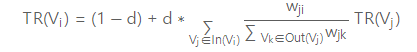

    - d: damping factor : 다른 페이지로 떠날 확률 (일반적으로 0.85로 설정)
    -  텍스트의 랭크 스코어 
    TR(Vi) = (1-d) * d * (sum(모든 (인접노드랭크스코어/해당 노드의 에지 개수))) 


In [71]:
#damping 값
d=0.85

#초기 스코어
initial=1

#각 노드에 연결된 에지 개수
bn_vn=2 
app_vn=2
br_vn=3
pine_vn=1

In [72]:
bnn = (1-d)+d*(1/app_vn+1/br_vn)
bnn

0.8583333333333333

In [73]:
apple = (1-d)+d*(1/bn_vn+1/br_vn)
apple

0.8583333333333333

In [74]:
berry=(1-d)+d*(1/bn_vn+1/app_vn+1/pine_vn)
berry

1.85

In [75]:
pine=(1-d)+d*(1/br_vn)
pine

0.43333333333333335

In [76]:
bnn_score=(1-d)+d*(apple/app_vn+berry/br_vn)
bnn_score

1.0389583333333334

In [77]:
def textrank_score():
    
    global bnn,apple,berry,pine
    
    bnn = (1-d)+d*(apple/app_vn+berry/br_vn)
    berry= (1-d)+d*(bnn/bn_vn+apple/app_vn+pine/pine_vn)
    apple = (1-d)+d*(bnn/bn_vn+berry/br_vn)
    pine=(1-d)+d*(berry/br_vn)
    
    
    return bnn,apple,berry,pine
    

In [69]:
#일정 횟수 이상 계산을 하면 수렴함, 여기서는 3번째인 berry가 1.46 으로 수렴하는데 4개중에 랭크스코어가 가장 높으므로 이를 채택함

for i in range(10):
    print(textrank_score())

(1.0389583333333334, 0.9668839409722223, 1.324682291666667, 0.5253266493055557)
(0.9362523242187502, 0.946092731100803, 1.4053605646158855, 0.5481854933078343)
(0.9502749040256756, 0.9567424432456957, 1.4219139142404127, 0.5528756090347836)
(0.9594911474142043, 0.9641810750355435, 1.4343435437100234, 0.5563973373845066)
(0.9661742942746127, 0.9695700595412438, 1.4433387687336472, 0.5589459844745334)
(0.971013259779562, 0.9734720347021444, 1.449851997514696, 0.5607913992958306)
(0.974517014044242, 0.9762973409190928, 1.4545680351186703, 0.5621276099502899)
(0.9770539798409044, 0.9783430623702621, 1.4579827797807452, 0.5630951209378778)
(0.9788909224452392, 0.9798243093366321, 1.4604552963437842, 0.5637956672974056)
(0.9802209987654742, 0.980896836866747, 1.4622455731461899, 0.5643029123914205)


## 18대 대통령 출마 연설문 키워드 추출

In [187]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

### 문재인 출마 연설문

In [188]:
base_url = "https://ko.wikisource.org/wiki/%EB%AF%BC%EC%A3%BC%ED%86%B5%ED%95%A9%EB%8B%B9_%EB%AC%B8%EC%9E%AC%EC%9D%B8_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%A0%9C18%EB%8C%80_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%84%A0%EA%B1%B0_%EC%B6%9C%EB%A7%88_%EC%84%A0%EC%96%B8%EB%AC%B8"
resp=requests.get(base_url)
resp

<Response [200]>

In [189]:
soup=BeautifulSoup(resp.text,"lxml")

In [190]:
content_tag=soup.select("#mw-content-text > div.mw-parser-output")

In [191]:
line_tags=content_tag[0].find_all("p")

In [192]:
content=""

for i in line_tags[1:-1]:
    content+=i.text


In [194]:
from konlpy.tag import Okt

In [195]:
okt=Okt()

In [196]:
pos=okt.pos(content)
pos

[('변화', 'Noun'),
 ('의', 'Josa'),
 ('새', 'Noun'),
 ('시대', 'Noun'),
 ('로', 'Josa'),
 ('가는', 'Verb'),
 ('문', 'Noun'),
 ('을', 'Josa'),
 ('열겠습니다', 'Verb'),
 ('존경', 'Noun'),
 ('하는', 'Verb'),
 ('국민', 'Noun'),
 ('여러분', 'Noun'),
 ('.', 'Punctuation'),
 ('당원', 'Noun'),
 ('동지', 'Noun'),
 ('여러분', 'Noun'),
 ('.', 'Punctuation'),
 ('감사합니다', 'Verb'),
 ('.', 'Punctuation'),
 ('여러분', 'Noun'),
 ('은', 'Josa'),
 ('대한민국', 'Noun'),
 ('의', 'Josa'),
 ('변화', 'Noun'),
 ('를', 'Josa'),
 ('선택', 'Noun'),
 ('하셨습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('정권', 'Noun'),
 ('교체', 'Noun'),
 ('를', 'Josa'),
 ('선택', 'Noun'),
 ('하셨습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('민주', 'Noun'),
 ('통합', 'Noun'),
 ('당', 'Suffix'),
 ('의', 'Josa'),
 ('승리', 'Noun'),
 ('를', 'Josa'),
 ('선택', 'Noun'),
 ('하셨습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('그리고', 'Conjunction'),
 ('저', 'Noun'),
 ('문재인', 'Noun'),
 ('을', 'Josa'),
 ('선택', 'Noun'),
 ('하셨습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('여러분', 'Noun'),
 ('의', 'Josa'),
 ('간절한', 'Adjective'),
 ('소망', 'Noun'

In [210]:
words=[]
for k,v in pos:
    if v=="Josa" or v=="Punctuation" or v=="Suffix" or len(k)<2:
        continue
    else:
        words.append(k)


In [211]:
words

['변화',
 '시대',
 '가는',
 '열겠습니다',
 '존경',
 '하는',
 '국민',
 '여러분',
 '당원',
 '동지',
 '여러분',
 '감사합니다',
 '여러분',
 '대한민국',
 '변화',
 '선택',
 '하셨습니다',
 '정권',
 '교체',
 '선택',
 '하셨습니다',
 '민주',
 '통합',
 '승리',
 '선택',
 '하셨습니다',
 '그리고',
 '문재인',
 '선택',
 '하셨습니다',
 '여러분',
 '간절한',
 '소망',
 '이루어내는',
 '주역',
 '되라는',
 '막중',
 '책임',
 '맡기셨습니다',
 '두렵지만',
 '무거운',
 '명의',
 '민주',
 '통합',
 '대통령',
 '보직',
 '수락',
 '합니다',
 '그리고',
 '부여',
 '막중',
 '책임',
 '반드시',
 '이루어',
 '것임',
 '약속',
 '드립니다',
 '여러분',
 '지지',
 '성원',
 '보답',
 '하겠습니다',
 '12월',
 '대통령선거',
 '반드시',
 '승리',
 '하겠습니다',
 '1년',
 '전만',
 '해도',
 '현실정치',
 '로부터',
 '멀리',
 '있었습니다',
 '그런',
 '민주',
 '통합',
 '대통령',
 '후보',
 '되었습니다',
 '많은',
 '도움',
 '있었습니다',
 '먼저',
 '수평',
 '정권',
 '교체',
 '이뤄내고',
 '국민',
 '참여',
 '시대',
 '열었던',
 '김대중',
 '노무현',
 '대통령',
 '계십니다',
 '오늘',
 '역사',
 '서있습니다',
 '변화',
 '갈망',
 '하는',
 '국민',
 '계셨습니다',
 '용기',
 '되었습니다',
 '변화',
 '대한',
 '간절함이',
 '승리',
 '원동력',
 '되었습니다',
 '국민',
 '경선',
 '함께',
 '100만',
 '명의',
 '시민',
 '계십니다',
 '정권',
 '교체',
 '나서도록',
 '모아주셨습니다',
 '무엇',
 '당원',
 '동지',
 '격려',
 '있었습니다

In [212]:
from collections import Counter

In [213]:
words_count=Counter(words)

In [214]:
words_rank=sorted(Counter(words).items(),key=lambda x:x[1],reverse=True)

In [215]:
words_rank

[('입니다', 63),
 ('하는', 21),
 ('대통령', 21),
 ('하겠습니다', 21),
 ('우리', 20),
 ('국민', 19),
 ('시대', 17),
 ('합니다', 17),
 ('있습니다', 17),
 ('변화', 13),
 ('여러분', 13),
 ('민주', 12),
 ('정부', 12),
 ('일자리', 11),
 ('통합', 10),
 ('문재인', 10),
 ('함께', 10),
 ('경제', 10),
 ('성장', 10),
 ('국가', 10),
 ('정치', 10),
 ('사람', 10),
 ('열겠습니다', 9),
 ('새로운', 9),
 ('가는', 8),
 ('교체', 8),
 ('만들겠습니다', 8),
 ('존경', 7),
 ('대한민국', 7),
 ('되었습니다', 7),
 ('특권', 7),
 ('이명박', 7),
 ('사회', 7),
 ('복지', 7),
 ('정권', 6),
 ('이었습니다', 6),
 ('협력', 6),
 ('있는', 6),
 ('세상', 6),
 ('평화', 6),
 ('그리고', 5),
 ('책임', 5),
 ('먼저', 5),
 ('역사', 5),
 ('않을', 5),
 ('했습니다', 5),
 ('지금', 5),
 ('재벌', 5),
 ('국정', 5),
 ('없을', 5),
 ('정의', 5),
 ('세우겠습니다', 5),
 ('복지국가', 5),
 ('한반도', 5),
 ('당원', 4),
 ('동지', 4),
 ('선택', 4),
 ('하셨습니다', 4),
 ('승리', 4),
 ('있었습니다', 4),
 ('오늘', 4),
 ('대한', 4),
 ('경쟁', 4),
 ('이제', 4),
 ('되겠습니다', 4),
 ('미국', 4),
 ('나라', 4),
 ('상생', 4),
 ('없습니다', 4),
 ('5년', 4),
 ('선거', 4),
 ('되면', 4),
 ('기회', 4),
 ('공존', 4),
 ('위원회', 4),
 ('문제', 4),
 ('계획', 4),
 ('통

In [142]:
# !pip install wordcloud

In [216]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes',unicode_minus = False)


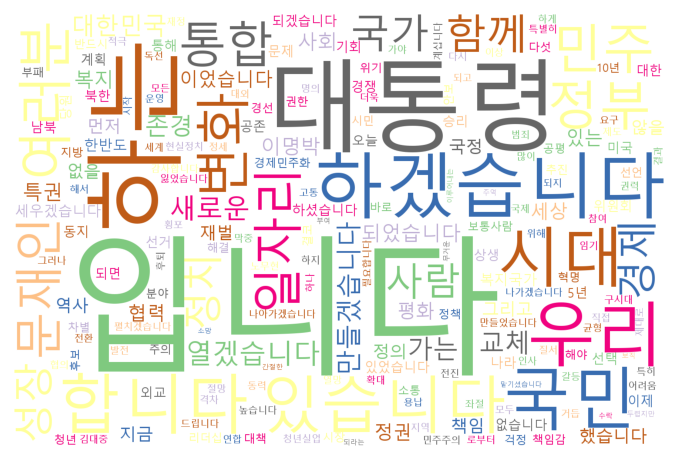

In [217]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words_count) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()



In [219]:
stop_words=["입니다","하는","하겠습니다","있습니다","합니다","이었습니다"]

words_count = {key:value for key, value in words_count.items() if key not in stop_words}

In [220]:
sorted(words_count.items(),key=lambda x:x[1],reverse=True)

[('대통령', 21),
 ('우리', 20),
 ('국민', 19),
 ('시대', 17),
 ('변화', 13),
 ('여러분', 13),
 ('민주', 12),
 ('정부', 12),
 ('일자리', 11),
 ('통합', 10),
 ('문재인', 10),
 ('함께', 10),
 ('경제', 10),
 ('성장', 10),
 ('국가', 10),
 ('정치', 10),
 ('사람', 10),
 ('열겠습니다', 9),
 ('새로운', 9),
 ('가는', 8),
 ('교체', 8),
 ('만들겠습니다', 8),
 ('존경', 7),
 ('대한민국', 7),
 ('되었습니다', 7),
 ('특권', 7),
 ('이명박', 7),
 ('사회', 7),
 ('복지', 7),
 ('정권', 6),
 ('협력', 6),
 ('있는', 6),
 ('세상', 6),
 ('평화', 6),
 ('그리고', 5),
 ('책임', 5),
 ('먼저', 5),
 ('역사', 5),
 ('않을', 5),
 ('했습니다', 5),
 ('지금', 5),
 ('재벌', 5),
 ('국정', 5),
 ('없을', 5),
 ('정의', 5),
 ('세우겠습니다', 5),
 ('복지국가', 5),
 ('한반도', 5),
 ('당원', 4),
 ('동지', 4),
 ('선택', 4),
 ('하셨습니다', 4),
 ('승리', 4),
 ('있었습니다', 4),
 ('오늘', 4),
 ('대한', 4),
 ('경쟁', 4),
 ('이제', 4),
 ('되겠습니다', 4),
 ('미국', 4),
 ('나라', 4),
 ('상생', 4),
 ('없습니다', 4),
 ('5년', 4),
 ('선거', 4),
 ('되면', 4),
 ('기회', 4),
 ('공존', 4),
 ('위원회', 4),
 ('문제', 4),
 ('계획', 4),
 ('통해', 4),
 ('외교', 4),
 ('남북', 4),
 ('북한', 4),
 ('반드시', 3),
 ('후보', 3),
 ('경선', 3),
 ('시민'

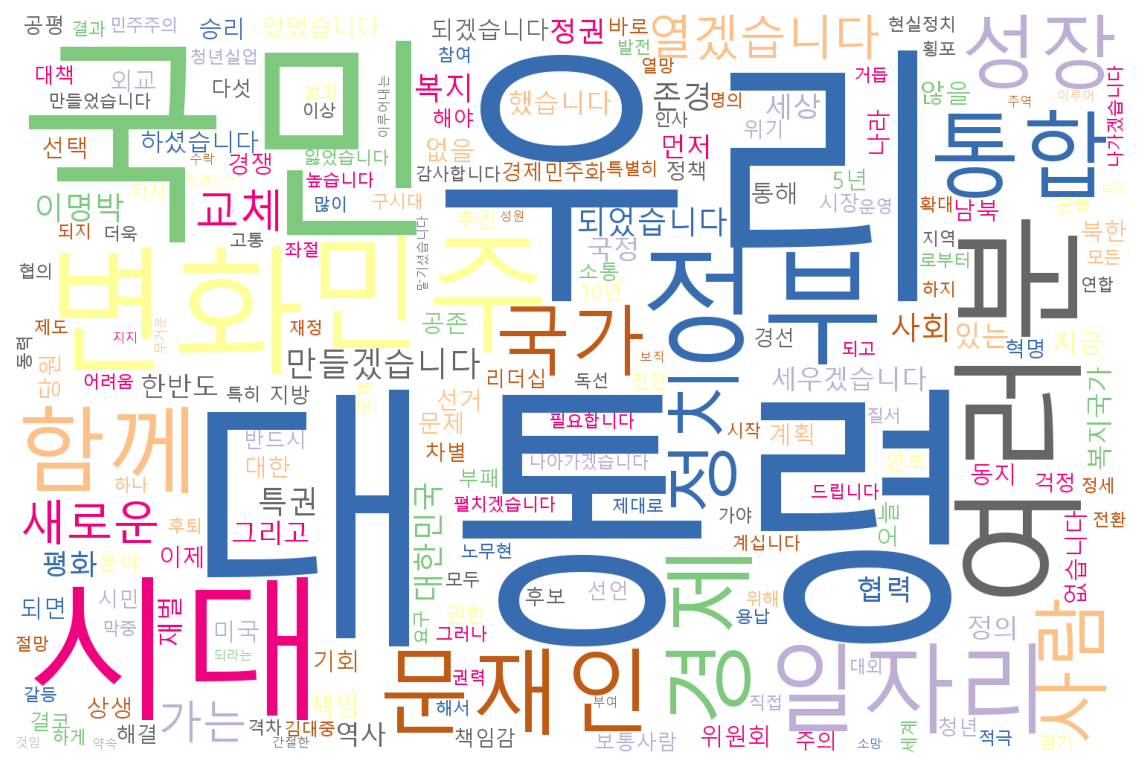

In [221]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words_count) 
plt.figure(figsize=(10,10))
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


In [242]:
words_str=" ".join(list(words_count.keys()))
words_str

'변화 시대 가는 열겠습니다 존경 국민 여러분 당원 동지 감사합니다 대한민국 선택 하셨습니다 정권 교체 민주 통합 승리 그리고 문재인 간절한 소망 이루어내는 주역 되라는 막중 책임 맡기셨습니다 두렵지만 무거운 명의 대통령 보직 수락 부여 반드시 이루어 것임 약속 드립니다 지지 성원 보답 12월 대통령선거 1년 전만 해도 현실정치 로부터 멀리 있었습니다 그런 후보 되었습니다 많은 도움 먼저 수평 이뤄내고 참여 열었던 김대중 노무현 계십니다 오늘 역사 서있습니다 갈망 계셨습니다 용기 대한 간절함이 원동력 경선 함께 100만 시민 나서도록 모아주셨습니다 무엇 격려 기간 내내 지탱 해준 버팀목 자랑스러운 보입니다 사실 언제나 잊지 않을 했습니다 위로 인사 감사 말씀 경쟁 거듭 나게 소명 책무 더욱 명확히 인식 하게 이제 잡겠습니다 이름 하나 되겠습니다 우리 세계사 환기 수년 미국 금융위기 지금 유럽 재정 위기 세계 경제 요동 나라 양극화 심화 되고 시장 만능 주의 장지 결과 곳곳 보통사람 무너지고 자본주의 걱정 소리 높습니다 자유롭지 개발독재 정경 유착 파행 압축 성장 이루었습니다 대외 의존 높은 그래서 안팎 어려움 직면 외치 달려오는 동안 특권 부패 만연했습니다 독선 아집 횡행 갈등 되풀이 구시대 문화 전진 가로막 질서 전환 요구 효율 상생 협력 불통 리더십 유산 권위 의식 없습니다 시대정신 소통 화합 발휘 공감 연대 펼치겠습니다 행복하십니까 국가 나를 위해 존재 한다고 느끼십니까 해주는 정부 생각 하십니까 현실 불안하고 아프기만 힘겨운 직장 생활 가계 여전히 투성이 40 50 가장 언제 일자리 잃을지 몰라 불안합니다 자영 업자 이미 포화상태 청년 수명 많이 늘어났는데 노후 대책 불공평 빈곤 회안 전망 부족 우리나라 자살률 만들었습니다 청소년 끔찍한 성적 인한 좌절 절망 스스로 포기 여성 두운 밤길 무섭습니다 부들 자녀 등하굣길 살펴야 있는 아이 안전 해야 범죄 만연하지만 치안 무력합니다 측근 비리는 기득권 정치 검찰 재벌 잡고 카르텔 횡포 이명박 5년 과거 돌려놓

In [243]:
from gensim.summarization import keywords
print(keywords(words_str))

문재인
실패했고
하도록
아우를
자유롭지
느끼십니까
아프기만
아우르는
두렵지만
생태계
우리당
그러나
자랑스러운
무너지고
진정한
이끄는
돌려놓아야
김대중 노무현
자살률
청소년
쓰이는 힘없는 관대하고


In [78]:
from gensim.summarization.summarizer import summarize

In [245]:
print(summarize(content))

변화의 새 시대로 가는 문을 열겠습니다 
그리고 저에게 부여된 막중한 책임을 반드시 이루어낼 것임을 약속드립니다.
그런 제가 민주통합당의 대통령후보가 되었습니다.
우리는 세계사적 전환기에 살고 있습니다.
저는 '소통과 화합'의 리더십을 발휘하겠습니다.
'공감과 연대'의 리더십을 펼치겠습니다.
저 문재인이 변화의 새 시대를 열겠습니다.
우리 역사가 계속 후퇴할 것이냐, 다시 전진할 것이냐, 지금 우리는 그 기로에 서 있습니다.
변화의 새시대로 가야 합니다.
이번 대통령 선거에서 역사의 물줄기를 다시 돌려놓아야 합니다.
'사람이 먼저입니다' 제가 대통령이 되면 이 말이 국정철학이 될 것입니다.
제가 대통령이 되면, '공평'과 '정의'가 국정운영의 근본이 될 것입니다.
특권과 반칙은 결코 용납하지 않을 것입니다.
병역의무를 회피한 사람이 고위공직에 오르는 일은 없을 것입니다.
새로운 시대로 가는 다섯 개의 문이 우리 앞에 있습니다.
그것은 일자리 혁명의 문입니다.
새로운 정치의 문입니다.
그리고 평화와 공존의 문입니다.
우리는 이 다섯 개의 문을 열어야 합니다.
첫 번째는 일자리 혁명의 문입니다.
'국가일자리위원회' 안에 '청년일자리특별위원회'를 두어 특별히 청년실업 문제를 챙길 것입니다.
변화의 새 시대로 가는 두 번째 문은 복지국가의 문입니다.
저 문재인은 '힐링 대통령'이 될 것입니다.
변화의 새 시대로 가는 세 번째 문은 경제민주화의 문입니다.
재벌의 특권과 횡포는 용납되지 않을 것입니다.
변화의 새 시대로 가는 네 번째 문은 새로운 정치의 문입니다.
대통령이 되면 저는 대한민국을 진정한 민주공화국으로 만들겠습니다.
대통령이 권한 밖의 특권을 갖는 일은 결코 없을 것입니다.
결코 초심을 잃지 않을 것입니다.
여당은 정책을 주도하게 될 것입니다.
편 가르기와 정치보복, 더 이상 없을 것입니다.
이를 토대로 정책을 협의할 것입니다.
변화의 새 시대로 가는 다섯 번째 문은 평화와 공존의 문입니다.
튼튼한 안보의 바탕 위에서 평화와 공존의 한반도를 실현해야 합니다.